In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

# 1. Importing the data

In [2]:
customers = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_customers_dataset.csv')
location = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_geolocation_dataset.csv')
ordered_products = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_order_items_dataset.csv')
payments = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_order_payments_dataset.csv')
reviews = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_order_reviews_dataset.csv')
orders = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_orders_dataset.csv')
products = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\olist_sellers_dataset.csv')
categories = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\product_category_name_translation.csv')

# 2. Data Transformation

Let's join the products table and the categories table so we can check the products table with English names in the next steps

In [3]:
# merging the tables
products_en = products.merge(categories, on = 'product_category_name',how = 'left')

#drop the original category name
products_en.drop('product_category_name', axis=1, inplace=True)

# rename the column
products_en.rename(columns = {'product_category_name_english' : 'product_category_name'}, inplace=True)
products_en

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


<h4>2.1 Merge Tables to create a table for visualization</h4>

In [5]:
new_df = orders.merge(payments, on = 'order_id', how = 'left')\
            .merge(ordered_products, on = 'order_id', how = 'left')\
            .merge(reviews, on = 'order_id', how = 'left')\
            .merge(customers, on ='customer_id' , how = 'left')\
            .merge(products_en ,on = 'product_id', how='left')\
            .merge(sellers, on = 'seller_id', how = 'left')

In [6]:
new_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,...,828.0,4.0,4950.0,40.0,10.0,40.0,baby,17602.0,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,...,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,8290.0,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175.0,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175.0,ilicinea,MG


<h4>2.2 Export the CSV file of merged table for visualization</h4>

In [7]:
new_df.to_csv(r'C:\Users\Kimiya\Documents\Datasources\Brazil Ecommerce\merged_final.csv', index=False)

# 3. Data Exploration

<h4>3.1 Checking each of the dataframes</h4>

In [103]:
dfs_list = [customers,location,ordered_products,payments,reviews,orders,products_en,sellers]

In [104]:
for df in dfs_list:
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f'Head of {df_name} is:\n')
    display(df.head())
    print(f'Shape of {df_name} is:\n')
    display(df.shape)
    print(f'\n Nulls and values of {df_name} :\n')
    display(df.info())
    print ('_______________________________________________________________________________________________________________________________________')
    print('\n')

Head of customers is:



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Shape of customers is:



(99441, 5)


 Nulls and values of customers :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

_______________________________________________________________________________________________________________________________________


Head of location is:



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Shape of location is:



(1000163, 5)


 Nulls and values of location :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

_______________________________________________________________________________________________________________________________________


Head of ordered_products is:



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Shape of ordered_products is:



(112650, 7)


 Nulls and values of ordered_products :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

_______________________________________________________________________________________________________________________________________


Head of payments is:



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Shape of payments is:



(103886, 5)


 Nulls and values of payments :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

_______________________________________________________________________________________________________________________________________


Head of reviews is:



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Shape of reviews is:



(99224, 7)


 Nulls and values of reviews :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

_______________________________________________________________________________________________________________________________________


Head of orders is:



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Shape of orders is:



(99441, 8)


 Nulls and values of orders :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

_______________________________________________________________________________________________________________________________________


Head of _ is:



,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


Shape of _ is:



(32328, 9)


 Nulls and values of _ :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_name_lenght         32328 non-null  float64
 2   product_description_lenght  32328 non-null  float64
 3   product_photos_qty          32328 non-null  float64
 4   product_weight_g            32327 non-null  float64
 5   product_length_cm           32327 non-null  float64
 6   product_height_cm           32327 non-null  float64
 7   product_width_cm            32327 non-null  float64
 8   product_category_name       32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


None

_______________________________________________________________________________________________________________________________________


Head of sellers is:



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Shape of sellers is:



(3095, 4)


 Nulls and values of sellers :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

_______________________________________________________________________________________________________________________________________




<h4>3.2 Checking null values</h4>

In [105]:
for df in dfs_list:
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f'Which columns in {df_name} have null values?\n')
    display(df.isna().any())

Which columns in customers have null values?



customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

Which columns in location have null values?



geolocation_zip_code_prefix    False
geolocation_lat                False
geolocation_lng                False
geolocation_city               False
geolocation_state              False
dtype: bool

Which columns in ordered_products have null values?



order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

Which columns in payments have null values?



order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

Which columns in reviews have null values?



review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

Which columns in orders have null values?



order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

Which columns in _ have null values?



product_id                    False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
product_category_name         False
dtype: bool

Which columns in sellers have null values?



seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

There are null values in the reviews, orders and products table, lets count them:

In [106]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [36]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [111]:
products_en.isna().sum()

product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         623
dtype: int64

# 4. Data Analysis

<h4>4.1 Customers Dataframe</h4>

How many unique values are there for customer ID and customer_unique_id?

In [39]:
customers['customer_id'].nunique()

99441

In [40]:
customers['customer_unique_id'].nunique()

96096

There are more customer IDs than unique customer IDs which mean there are customers who ordered several times. 

Where are the customers from?

In [44]:
customers['customer_city'].nunique()

4119

In [47]:
cities_count = customers.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
cities_count

,customer_city,customer_unique_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


In [49]:
top_10_cities = cities_count.sort_values(by = 'customer_unique_id', ascending = False).head(10)
top_10_cities

,customer_city,customer_unique_id
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465
707,campinas,1398
2964,porto alegre,1326
3247,salvador,1209
1529,guarulhos,1153
3428,sao bernardo do campo,908


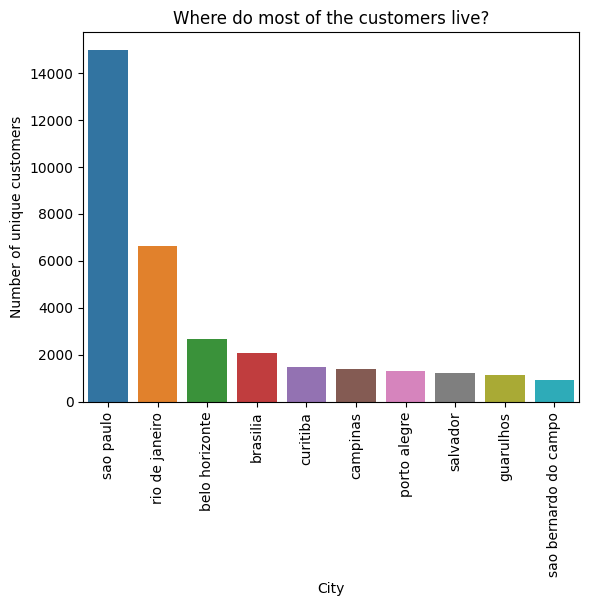

In [54]:
warnings.filterwarnings("ignore", category=FutureWarning)
sns.barplot(x = 'customer_city',
            y = 'customer_unique_id',
            data = top_10_cities)

plt.title('Where do most of the customers live?')
plt.xlabel('City')
plt.ylabel('Number of unique customers')
plt.xticks(rotation = 90)
plt.show()

In [62]:
customers[customers['customer_city'] == 'sao paulo']['customer_unique_id'].nunique() / customers['customer_unique_id'].nunique()

0.15592740592740592

16% of the customers are located in Sao Paulo

<h4>4.2 Ordered Products Dataframe</h4>

Let's check what are the numerical values

In [65]:
numerical_orders = ordered_products.select_dtypes(np.number)
numerical_orders 

,order_item_id,price,freight_value
0,1,58.90,13.29
1,1,239.90,19.93
2,1,199.00,17.87
3,1,12.99,12.79
4,1,199.90,18.14
...,...,...,...
112645,1,299.99,43.41
112646,1,350.00,36.53
112647,1,99.90,16.95
112648,1,55.99,8.72


Let's create a histogram for each of these values to find out how they are distributed.

In [67]:
list_of_num = numerical_orders.columns.to_list()

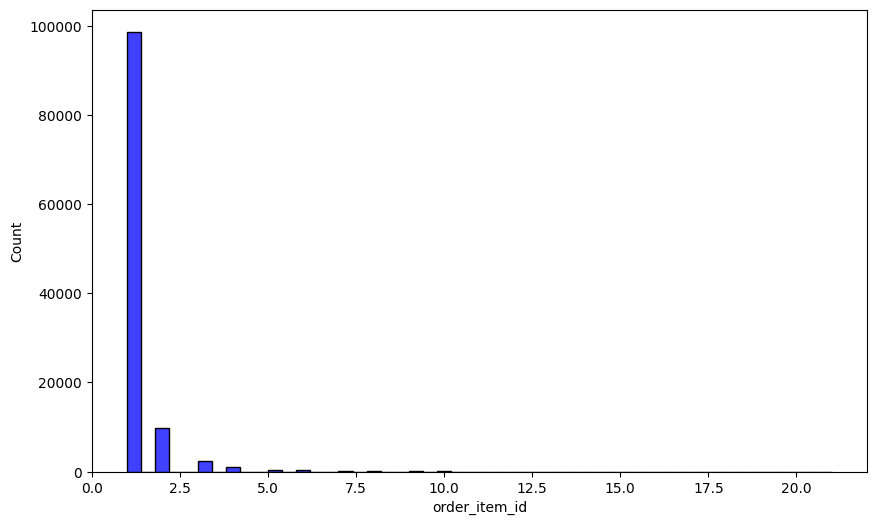

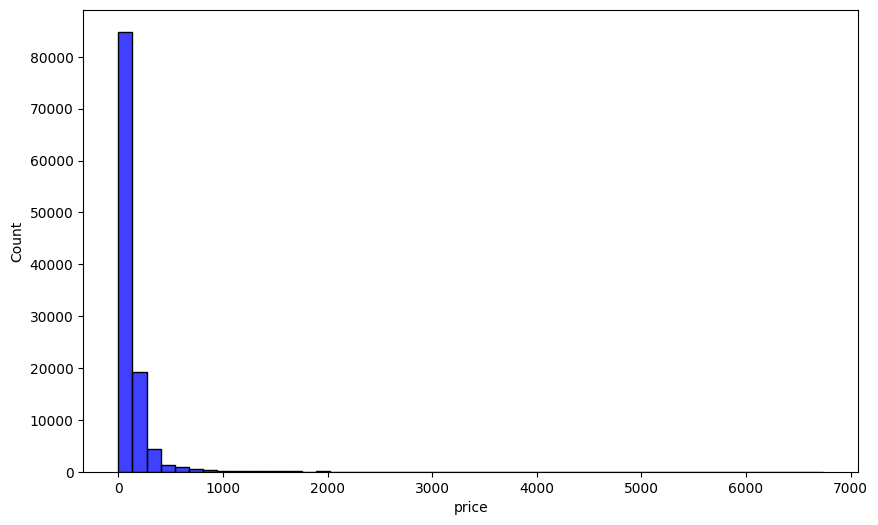

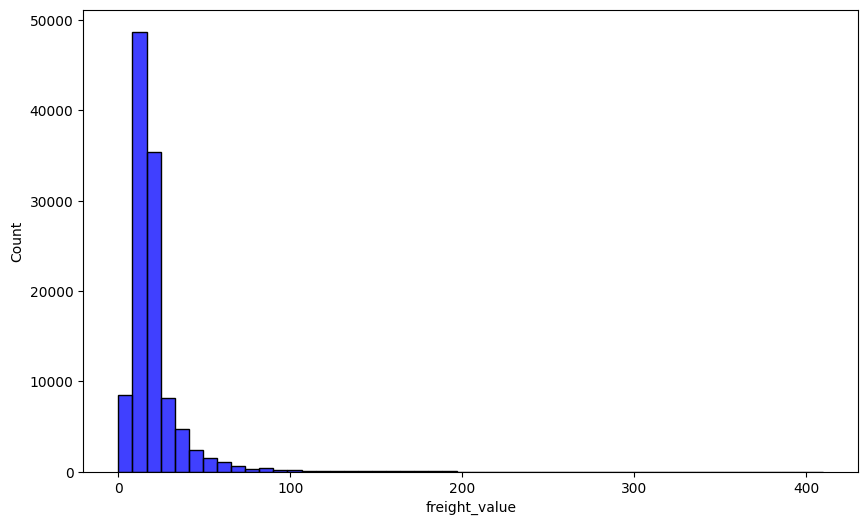

In [87]:
for c in list_of_num:
    plt.figure(figsize=[10, 6])
    sns.histplot(ordered_products[c], bins= 50, color='blue')
    plt.show()

It is visible that most of the orders only include one item and the most of purchased products values are below 300.

In [76]:
ordered_pr = ordered_products.value_counts('product_id')
ordered_pr

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6ca99f05e9c1952a6597264e87f01378      1
6ca54e191592a843087a042b0665d7ef      1
6ca5428af5edb5066b1966ad58501b60      1
6ca32b4631431cb1fe976880797a0f5c      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: count, Length: 32951, dtype: int64

Top 10 Purchased products:

In [77]:
ordered_pr.head(10)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64

<h4>4.3 Payment Dataframe</h4>

The distribution of different payment methods:

In [84]:
count_payment_methods = payments[payments['payment_type'] != 'not_defined']['payment_type'].value_counts().reset_index()
count_payment_methods

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


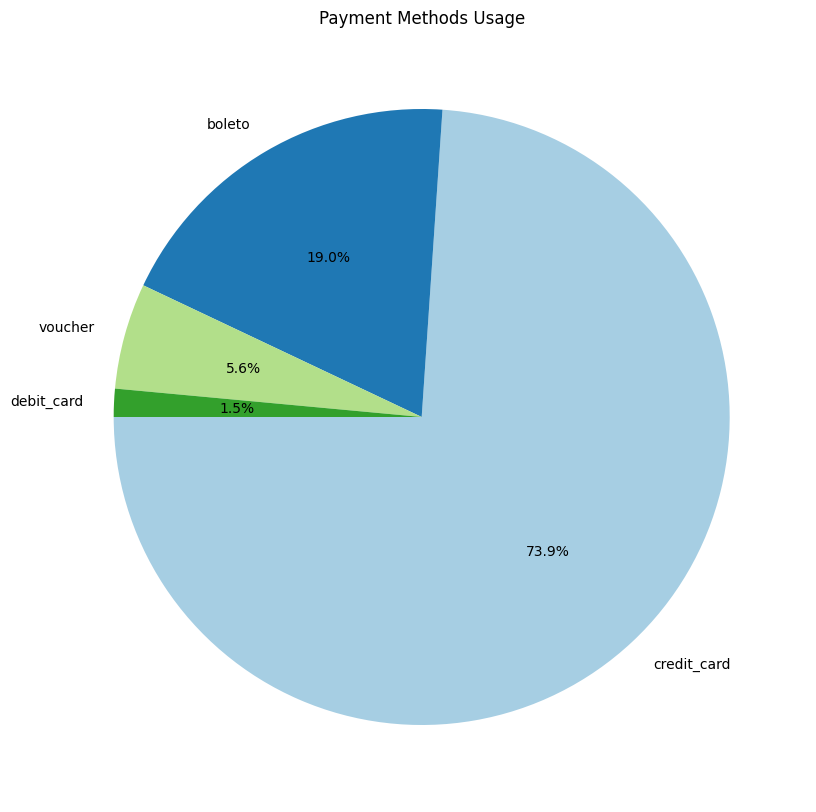

In [90]:
labels = count_payment_methods['payment_type']
sizes = count_payment_methods['count']
custom_palette = sns.color_palette("Paired")

plt.figure(figsize=[10, 10])
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 180, colors = custom_palette)
plt.title('Payment Methods Usage')

plt.show()

Payment installments distribution:

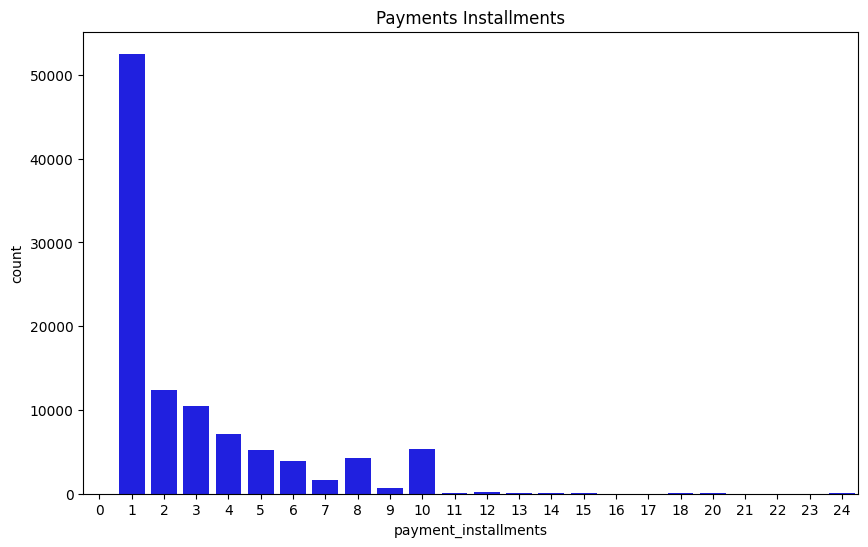

In [96]:
plt.figure(figsize=[10, 6])
sns.countplot(x = payments['payment_installments'], color = 'blue')
plt.title('Payments Installments')
plt.show()

Most of the customers pay in one installment and use credit card as payment method.